<a href="https://colab.research.google.com/github/wangzifan184/Apktool/blob/master/Data_Wrangling_Exploratory_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Data

In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # Plotting library
%matplotlib inline
import pickle # Read/Write with Serialization
import requests # Makes HTTP requests
from io import BytesIO # Use When expecting bytes-like objects
from sklearn.model_selection import train_test_split # Creating Training/Testing Splits
from skimage.feature import canny # Uses the Canny filter is a multi-stage edge detector

In [18]:
# Classes we will load
categories = ['cow', 'panda', 'lion', 'tiger', 'raccoon', 'monkey', 'hedgehog', 'zebra', 'horse', 'owl']

# Dictionary for URL and class labels
URL_DATA = {}
for category in categories:
    URL_DATA[category] = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/' + category +'.npy'

In [ ]:
# download dataset with loop into dict
classes_dict = {}
for key, value in URL_DATA.items():
    response = requests.get(value)
    classes_dict[key] = np.load(BytesIO(response.content))

In [20]:
# Normalize image pixels between 0 and 1 and then add class labels
for i, (key, value) in enumerate(classes_dict.items()):
    value = value.astype('float32')/255.
    if i == 0:
        classes_dict[key] = np.c_[value, np.zeros(len(value))]
    else:
        classes_dict[key] = np.c_[value,i*np.ones(len(value))]

# Create a dict with label codes
label_dict = {0:'cow', 1:'panda', 2:'lion', 3:'tiger', 4:'raccoon', 5:'monkey', 6:'hedgehog', 7:'zebra', 8:'horse', 9:'owl'}

In [21]:
# Aggregate 3000 arrays from each doodle into one array (doodles)
lst = []
for key, value in classes_dict.items():
    lst.append(value[:3000])
doodles = np.concatenate(lst)

In [22]:
# Split the data into features and class labels (X & y respectively)
y = doodles[:,-1].astype('float32')
X = doodles[:,:784]

# Split each dataset into train/test splits
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [23]:
# Save X_train dataset as a pickle file
with open('xtrain_doodle.pickle', 'wb') as f:
    pickle.dump(X_train, f)
    
# Save X_test dataset as a pickle file
with open('xtest_doodle.pickle', 'wb') as f:
    pickle.dump(X_test, f)
    
# Save y_train dataset as a pickle file
with open('ytrain_doodle.pickle', 'wb') as f:
    pickle.dump(y_train, f)
    
# Save y_test dataset as a pickle file
with open('ytest_doodle.pickle', 'wb') as f:
    pickle.dump(y_test, f)

Exploratory Analysis

In [24]:
# How many of each class is in the testing set
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0.0: 951,
 1.0: 923,
 2.0: 915,
 3.0: 905,
 4.0: 906,
 5.0: 870,
 6.0: 915,
 7.0: 866,
 8.0: 847,
 9.0: 902}

In [25]:
# Mean / Median
for key, value in classes_dict.items():
    print(key, 'Mean:',np.mean(value), 'Median:',np.median(value))

cow Mean: 0.2021244670217241 Median: 0.0
panda Mean: 0.23601939240481168 Median: 0.0
lion Mean: 0.2428014672148835 Median: 0.0
tiger Mean: 0.21779400744643626 Median: 0.0
raccoon Mean: 0.21576151932601476 Median: 0.0
monkey Mean: 0.21804086387175797 Median: 0.0
hedgehog Mean: 0.22844571147017287 Median: 0.0
zebra Mean: 0.22440145417402868 Median: 0.0
horse Mean: 0.18271965719112934 Median: 0.0
owl Mean: 0.21676120187345693 Median: 0.0


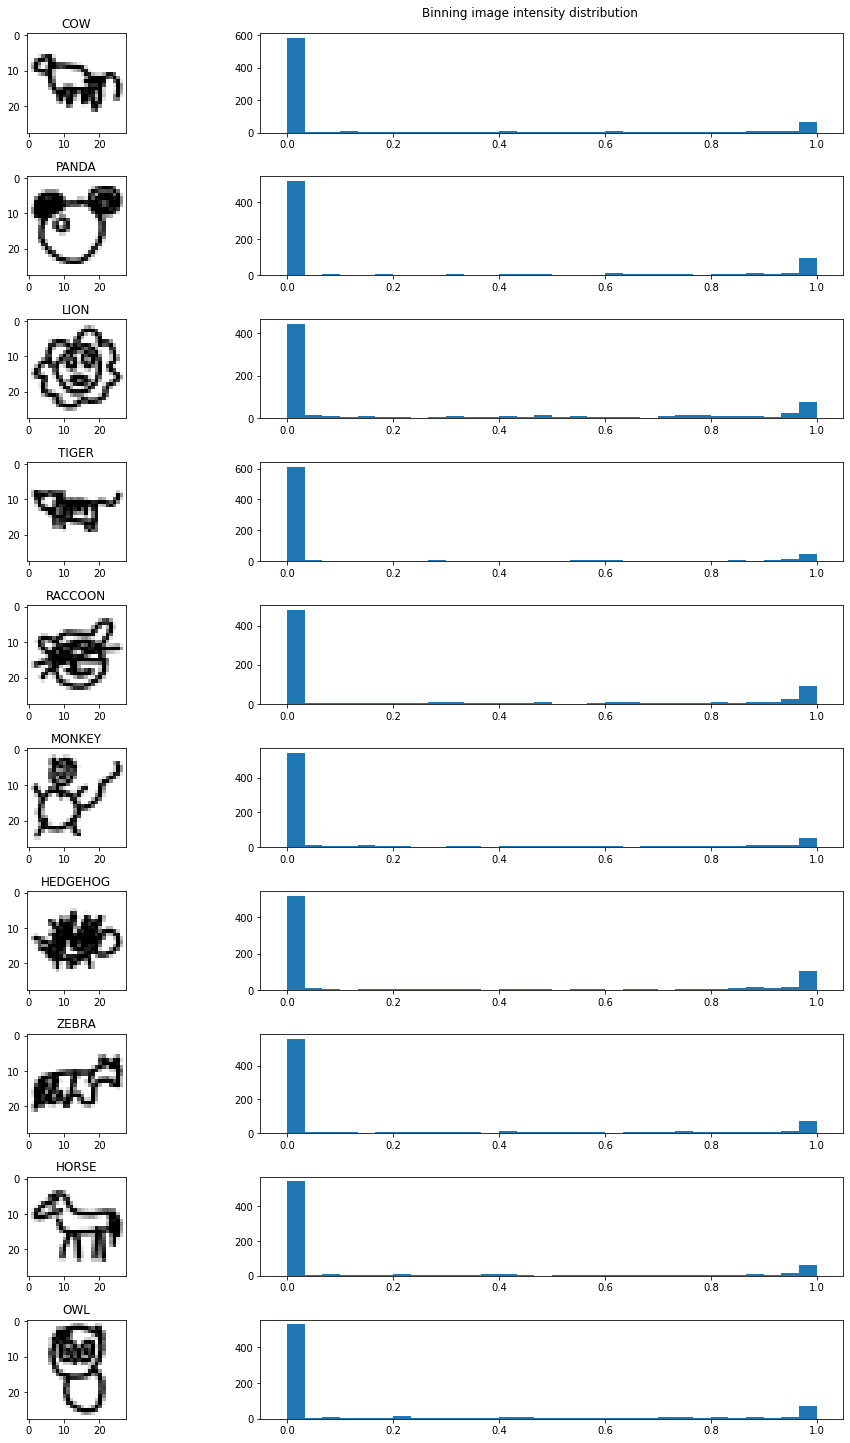

In [26]:
# Create Image Intensity Histrogram for each class
fig, axs = plt.subplots(10, 2, figsize=(15,20))
plt.suptitle('Binning image intensity distribution', x=.7,y=1)
for i, (key,value) in enumerate(classes_dict.items()):
    axs[i,0].set_title(key.upper())
    axs[i,0].imshow(value[0,:784].reshape((28,28)), cmap="gray_r")
    axs[i,1].hist(value[0,:784].reshape((28,28)).flatten(), bins=30,)
plt.tight_layout()

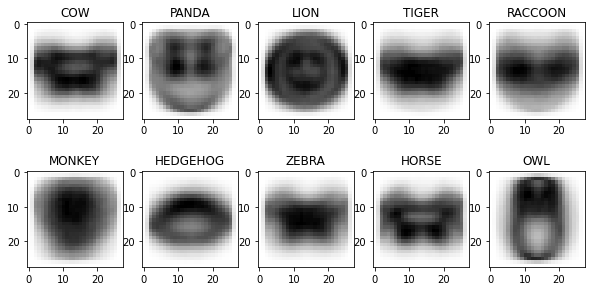

In [27]:
# Plot the average doodle for each class
plt.figure(figsize=(10,5))
for key, value in label_dict.items():
    lst = []
    for k in range(784):
        lst.append(np.mean(doodles[doodles[:,-1]==key,k]))
    plt.subplot(2,5,key+1)
    plt.imshow(np.array(lst).reshape((28,28)), cmap="gray_r")
    plt.title(value.upper())

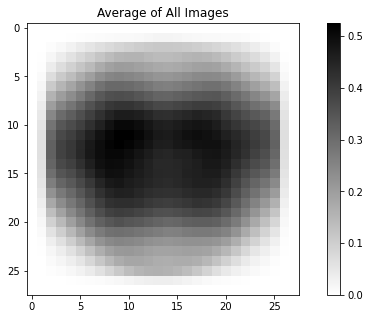

In [28]:
# Plot the average doodle for all images
plt.figure(figsize=(10,5))
for key, value in label_dict.items():
    lst = []
    for k in range(784):
        lst.append(np.mean(doodles[:,k]))
plt.imshow(np.array(lst).reshape((28,28)), cmap="gray_r")
plt.title('Average of All Images')
plt.colorbar()

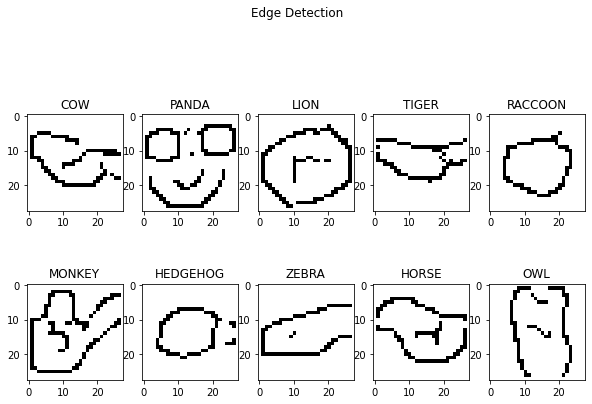

In [29]:
# Use the Canny filter which reduces the effect of noise present in the image and then
# potential edges are thinned down to 1-pixel curves by removing non-maximum pixels of the gradient magnitude

fig = plt.figure(figsize=(10,7))
edges = []
plt.suptitle('Edge Detection')
plt.subplots_adjust(hspace=-.2)
for i, (key,value) in enumerate(classes_dict.items()):
    ax = fig.add_subplot(2,5,i+1)
    edge = canny(value[0,:784].reshape((28,28)), sigma=3)
    plt.imshow(edge, cmap='binary')
    edges.append(edge)
    plt.title(key.upper())